# Early Stage Diabetes Detection - Case study

In [110]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

0 means no
1 means yes

In [111]:
df = pd.read_csv('diabetes_data.csv',sep=';')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Checking Missing Values

In [112]:
df.isna().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

### Distribution of Target Variable

<AxesSubplot:xlabel='class', ylabel='count'>

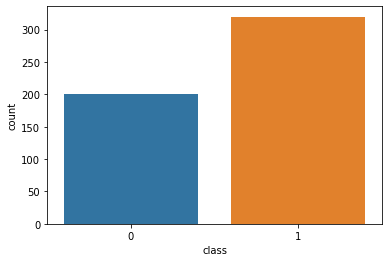

In [114]:
import seaborn as sns

sns.countplot(df['class'],data=df)

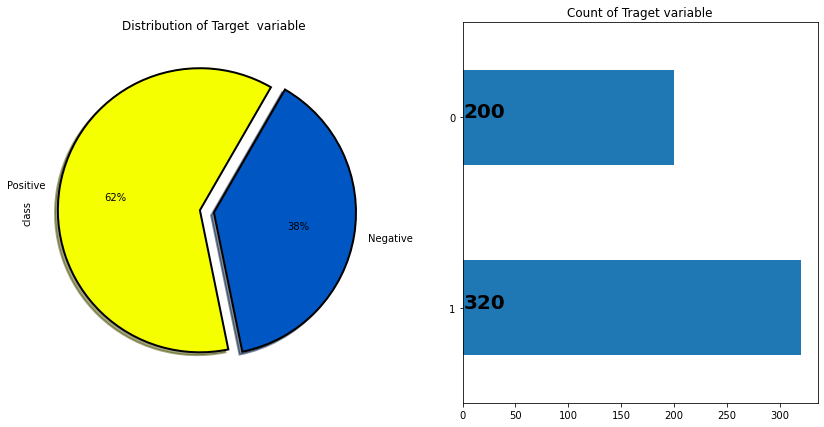

In [115]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

# Obserrvation:
. For 0 class label, two hundred records are present in the dataset, and for 1 class label, there are three hundred and twenty of total entries are present. The distribution looks a bit imbalanced, therefore, in pre-processing phase, Smote library would be used to balance the dataset, which uses pipeline to under sample and over sample the dataset depending upon the amount of data available in the dataset.

### Distribution of Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

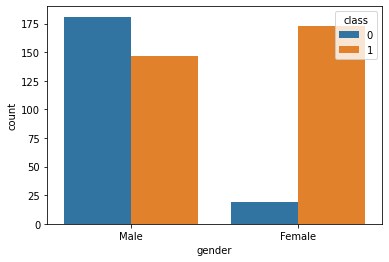

In [116]:
import seaborn as sns

sns.countplot(df['gender'],hue=df['class'], data=df)

In [117]:
 plot_criteria= ['gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


# Observation:
    In male people, it can be seen that, there are a greater number of 0 class label approximately close to 175, while 1 class label is less which is close to 140. In contrast, in females, there are a greater number of diabetic patients as compared to non-diabetic ones. The difference is very huge: females having diabetes have almost 175 entries, while females not having diabetes are close to 25 entries.

<AxesSubplot:xlabel='sudden_weight_loss', ylabel='count'>

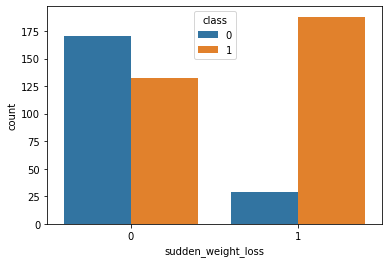

In [118]:
sns.countplot(df['sudden_weight_loss'],hue=df['class'], data=df)

In [119]:
plot_criteria= ['sudden_weight_loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
sudden_weight_loss,,
0,85.500000,41.250000
1,14.500000,58.750000


# Observation:
    It can be seen from the count plot  that people were diabetic experienced a sudden weight loss as compared to those who weren’t diabetic

### Distribution of weakness

<AxesSubplot:xlabel='weakness', ylabel='count'>

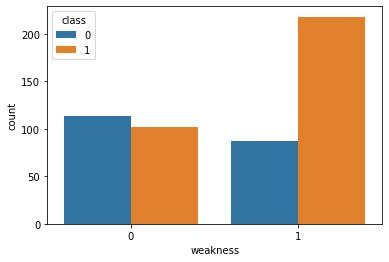

In [120]:
sns.countplot(df['weakness'],hue=df['class'], data=df)

In [121]:
plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
weakness,,
0,56.500000,31.870000
1,43.500000,68.120000


Polyphagia, also known as hyperphagia, is the medical term for excessive or extreme hunger. 

It's different than having an increased appetite after exercise or other physical activity. 

While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.

<AxesSubplot:xlabel='polyphagia', ylabel='count'>

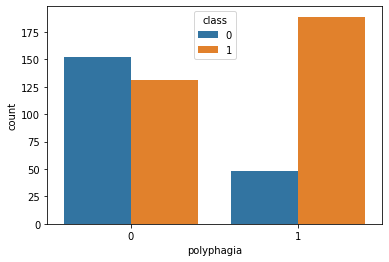

In [122]:
sns.countplot(df['polyphagia'],hue=df['class'], data=df)

In [123]:
plot_criteria= ['polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
polyphagia,,
0,76.000000,40.940000
1,24.000000,59.060000


# Observation:
It can be seen from the count plot below that people who had diabetes, the number of people having Polyphagia was more as compared to those not having diabetes. There were 59% of people having Polyphagia in diabetes, and 24% of people didn’t have polyphagia.

### Distribution of genital thrush

Thrush (or candidiasis) is a common condition caused by a type of yeast called Candida. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful.


<AxesSubplot:xlabel='genital_thrush', ylabel='count'>

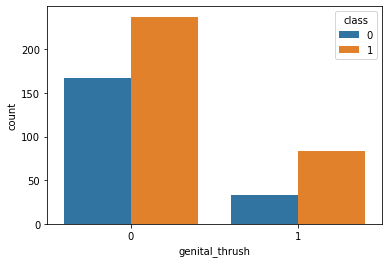

In [124]:
sns.countplot(df['genital_thrush'],hue=df['class'], data=df)

In [125]:
plot_criteria= ['genital_thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
genital_thrush,,
0,83.500000,74.060000
1,16.500000,25.940000


# Obsevation:
    . In diabetic people, 74% of people didn’t have genital thrush as compared to those non-diabetic patients, where only 25% of people had genital thrush. In contrast, 83% of people didn’t have genital thrush who didn’t have diabetes problem as compared to those who had genital thrush were 16%.

### Distribution of Visual Blurring

<AxesSubplot:xlabel='visual_blurring', ylabel='count'>

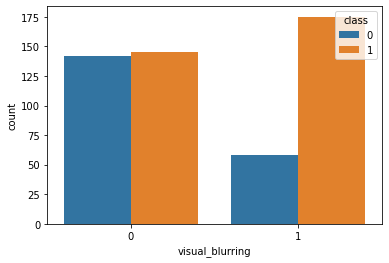

In [126]:
sns.countplot(df['visual_blurring'],hue=df['class'], data=df)

In [127]:
plot_criteria= ['visual_blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
visual_blurring,,
0,71.000000,45.310000
1,29.000000,54.690000


# Observation:
    people who were found diabetic were found having visual blurring 54% of the times, while 45% of times were found as not having visual blurring. Similarly, people who were not diabetic were found having visual blurring 71% of the times, and 29% of the times were not found having visual blurring.

### Itching

<AxesSubplot:xlabel='itching', ylabel='count'>

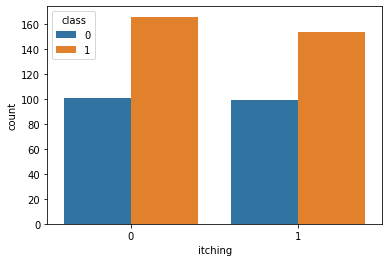

In [128]:
sns.countplot(df['itching'],hue=df['class'], data=df)

In [129]:
plot_criteria= ['itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
itching,,
0,50.500000,51.880000
1,49.500000,48.120000


# Observation:
    It can be seen from the count plot  that people who didn’t have the problem of itching were found almost equal in both the classes of patients having diabetes (51%) and not having diabetes (50%). On the other hand, people who had been facing the problems of itching, were also almost equal in both classes of patients having diabetes (48%), and patients not having diabetes (49%). 

### Irritability

<AxesSubplot:xlabel='irritability', ylabel='count'>

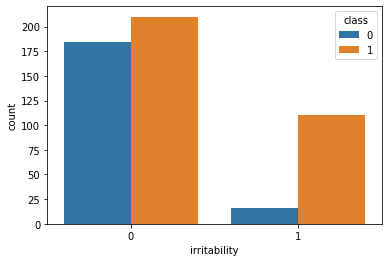

In [130]:
sns.countplot(df['irritability'],hue=df['class'], data=df)

In [131]:
plot_criteria= ['irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
irritability,,
0,92.000000,65.620000
1,8.000000,34.380000


# Observation:
it can be seen that, people not having irritability were found 92% of the times not having diabetes, and people having diabetes were found 65% of the times having irritability problem. In contrast, people having diabetes were found to have 34% of the times having irritability problem, while only 8% of the times, they weren’t having irritability problem

### Delayed Healing

<AxesSubplot:xlabel='delayed_healing', ylabel='count'>

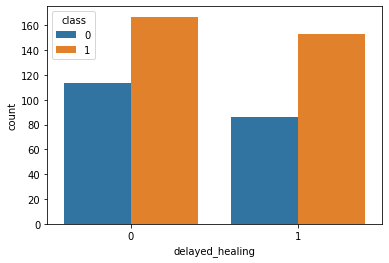

In [132]:
sns.countplot(df['delayed_healing'],hue=df['class'], data=df)

In [133]:
plot_criteria= ['delayed_healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
delayed_healing,,
0,57.000000,52.190000
1,43.000000,47.810000


### Partial Paresis

Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal.

<AxesSubplot:xlabel='partial_paresis', ylabel='count'>

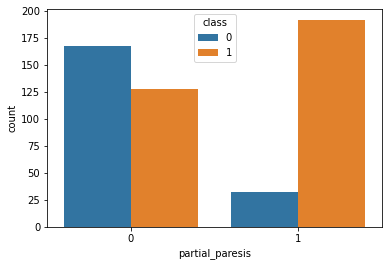

In [134]:
sns.countplot(df['partial_paresis'],hue=df['class'], data=df)

In [135]:
plot_criteria= ['partial_paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
partial_paresis,,
0,84.000000,40.000000
1,16.000000,60.000000


### Muscle Stiffness

<AxesSubplot:xlabel='muscle_stiffness', ylabel='count'>

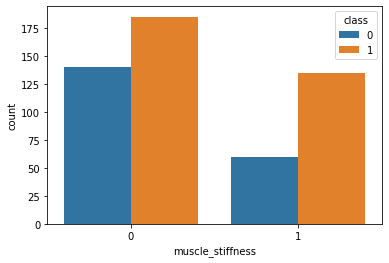

In [136]:
sns.countplot(df['muscle_stiffness'],hue=df['class'], data=df)

In [137]:
plot_criteria= ['muscle_stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
muscle_stiffness,,
0,70.000000,57.810000
1,30.000000,42.190000


### Alopecia

Sudden hair loss that starts with one or more circular bald patches that may overlap.
Alopecia areata occurs when the immune system attacks hair follicles and may be brought on by severe stress.
The main symptom is hair loss.

<AxesSubplot:xlabel='alopecia', ylabel='count'>

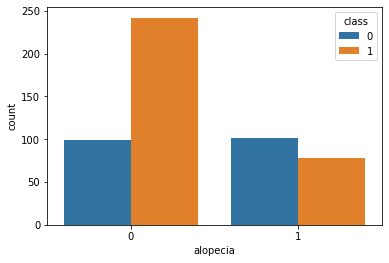

In [138]:
sns.countplot(df['alopecia'],hue=df['class'], data=df)

In [139]:
plot_criteria= ['alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
alopecia,,
0,49.500000,75.620000
1,50.500000,24.380000


### Obesity

<AxesSubplot:xlabel='obesity', ylabel='count'>

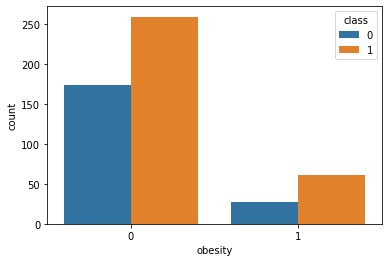

In [140]:
sns.countplot(df['obesity'],hue=df['class'], data=df)

In [141]:
plot_criteria= ['obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
obesity,,
0,86.500000,80.940000
1,13.500000,19.060000


# heatmap correlation plot:
Correlation shows the relationship between the features. For example, if one feature increases another feature can b decrease or increase. Its shows the proportionality between the features points. In the given below the figure, the heatmap is used to show a representation of the data in two dimensions.  The darker colors show the higher values and the lighter color shows the lower values in the DataFrame. 

<AxesSubplot:>

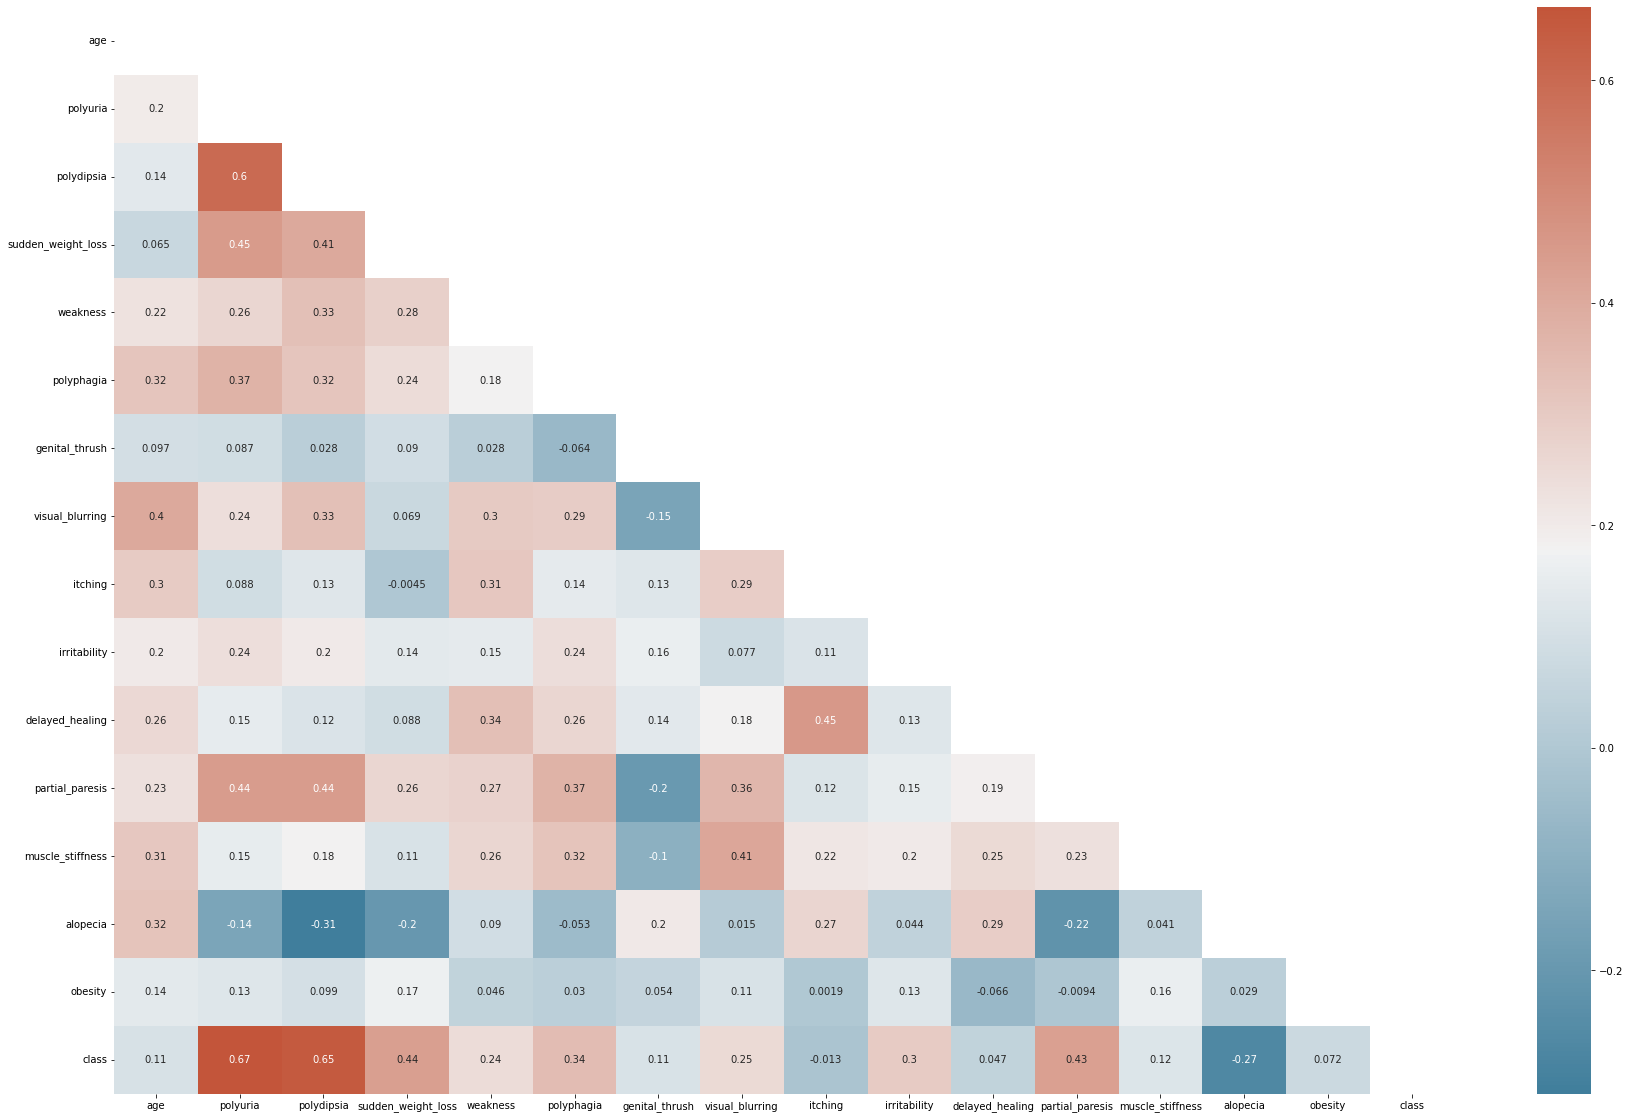

In [142]:
corr=df.corr()
f, ax = plt.subplots(figsize=(30, 20))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

### Data pre-processing

# encoding categorical features using label encoder

In [143]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

# seperating target and input attributes

In [144]:
X=df.drop(['class'],axis=1)
y=df['class']

# smote obersampling to balance dataset

In [145]:
# Oversample with SMOTE and random undersample for imbalanced dataset

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define pipeline
over = SMOTE(random_state=10000)

steps = [('over', over)]

pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [146]:
df=pd.concat([X,y],axis=1)

In [147]:
df.to_csv('final.csv')

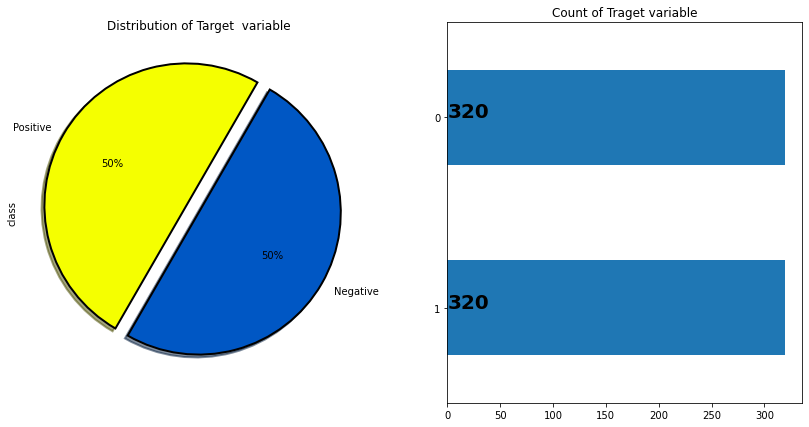

In [148]:
# plotting to create pie chart and bar plot as subplots to check if data is now balanced
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

In [149]:
!pip install h2o

In [150]:
import h2o

In [151]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 hours 7 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_Samuel_i15tjf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.515 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


# 4.3.5 Importing H20AutoML and Parsing CSV File

In [152]:
from h2o.automl import H2OAutoML

In [153]:
data = h2o.import_file("final.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# split into train and validation sets

In [154]:
 # split into train and validation sets
train, valid = data.split_frame(ratios = [.8], seed = 1234)

# Defining Input and Output as x and y

In [155]:
x = train.columns
y = "class"
x.remove(y)

# 4.3.8 Converting asfactor() train[y] and valid[y]
H20AutoML requires training and validation sets to be converted into categorical features using asfactor() function. This function helps to convert the numerical features into categorical ones, and this how things work with H20AutoML


In [156]:
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()

In [157]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 20, seed = 12)
aml.train(x =x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |█
01:32:02.973: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
01:32:02.991: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_4_20221002_13202_model_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,255.0,255.0,95317.0,5.0,12.0,8.819608,18.0,28.0,24.988235




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 3.996606030556619e-12
RMSE: 1.999151327577935e-06
LogLoss: 5.134909633376674e-07
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999757078919529: 


,,0,1,Error,Rate
0,0,252.0,0.0,0.0,(0.0/252.0)
1,1,0.0,260.0,0.0,(0.0/260.0)
2,Total,252.0,260.0,0.0,(0.0/512.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.999757e-01,1.000000,154.0
1,max f2,9.999757e-01,1.000000,154.0
2,max f0point5,9.999757e-01,1.000000,154.0
3,max accuracy,9.999757e-01,1.000000,154.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.999757e-01,1.000000,154.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.999757e-01,1.000000,154.0
8,max min_per_class_accuracy,9.999757e-01,1.000000,154.0
9,max mean_per_class_accuracy,9.999757e-01,1.000000,154.0



Gains/Lift Table: Avg response rate: 50.78 %, avg score: 50.78 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011719,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.023077,0.023077,96.923077,96.923077,0.023077
1,2,0.021484,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.019231,0.042308,96.923077,96.923077,0.042308
2,3,0.031250,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.019231,0.061538,96.923077,96.923077,0.061538
3,4,0.041016,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.019231,0.080769,96.923077,96.923077,0.080769
4,5,0.050781,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.019231,0.100000,96.923077,96.923077,0.100000
5,6,0.101562,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.200000,96.923077,96.923077,0.200000
6,7,0.150391,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.096154,0.296154,96.923077,96.923077,0.296154
7,8,0.201172,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.396154,96.923077,96.923077,0.396154
8,9,0.300781,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.196154,0.592308,96.923077,96.923077,0.592308
9,10,0.400391,9.999998e-01,1.969231,1.969231,1.000000,9.999999e-01,1.000000,1.000000,0.196154,0.788462,96.923077,96.923077,0.788462




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 1.8901575491376075e-05
RMSE: 0.004347594218803783
LogLoss: 0.00045142923685749384
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.997006481758634: 


,,0,1,Error,Rate
0,0,68.0,0.0,0.0,(0.0/68.0)
1,1,0.0,60.0,0.0,(0.0/60.0)
2,Total,68.0,60.0,0.0,(0.0/128.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.970065e-01,1.000000,59.0
1,max f2,9.970065e-01,1.000000,59.0
2,max f0point5,9.970065e-01,1.000000,59.0
3,max accuracy,9.970065e-01,1.000000,59.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.970065e-01,1.000000,59.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.970065e-01,1.000000,59.0
8,max min_per_class_accuracy,9.970065e-01,1.000000,59.0
9,max mean_per_class_accuracy,9.970065e-01,1.000000,59.0



Gains/Lift Table: Avg response rate: 46.88 %, avg score: 46.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.015625,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.033333,0.033333,113.333333,113.333333,0.033333
1,2,0.023438,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.050000,113.333333,113.333333,0.050000
2,3,0.031250,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.066667,113.333333,113.333333,0.066667
3,4,0.046875,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.033333,0.100000,113.333333,113.333333,0.100000
4,5,0.054688,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.116667,113.333333,113.333333,0.116667
5,6,0.101562,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.216667,113.333333,113.333333,0.216667
6,7,0.156250,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.116667,0.333333,113.333333,113.333333,0.333333
7,8,0.203125,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.433333,113.333333,113.333333,0.433333
8,9,0.304688,9.999999e-01,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.216667,0.650000,113.333333,113.333333,0.650000
9,10,0.398438,9.999991e-01,2.133333,2.133333,1.000000,9.999998e-01,1.000000,1.000000,0.200000,0.850000,113.333333,113.333333,0.850000




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.00420157484409111
RMSE: 0.06481955603127122
LogLoss: 0.015518337042222432
Mean Per-Class Error: 0.0038461538461538464
AUC: 0.9998778998778999
AUCPR: 0.9998835521177416
Gini: 0.9997557997557998

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5069253925518948: 


,,0,1,Error,Rate
0,0,252.0,0.0,0.0,(0.0/252.0)
1,1,2.0,258.0,0.0077,(2.0/260.0)
2,Total,254.0,258.0,0.0039,(2.0/512.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,5.069254e-01,0.996139,134.0
1,max f2,3.109325e-02,0.995406,142.0
2,max f0point5,5.069254e-01,0.998452,134.0
3,max accuracy,5.069254e-01,0.996094,134.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,3.109325e-02,1.000000,142.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,5.069254e-01,0.992217,134.0
8,max min_per_class_accuracy,5.069254e-01,0.992308,134.0
9,max mean_per_class_accuracy,5.069254e-01,0.996154,134.0



Gains/Lift Table: Avg response rate: 50.78 %, avg score: 50.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.158203,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.311538,0.311538,96.923077,96.923077,0.311538
1,2,0.201172,9.999999e-01,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.084615,0.396154,96.923077,96.923077,0.396154
2,3,0.300781,9.999939e-01,1.969231,1.969231,1.000000,9.999985e-01,1.000000,0.999999,0.196154,0.592308,96.923077,96.923077,0.592308
3,4,0.400391,9.993541e-01,1.969231,1.969231,1.000000,9.998259e-01,1.000000,0.999956,0.196154,0.788462,96.923077,96.923077,0.788462
4,5,0.500000,8.464605e-01,1.969231,1.969231,1.000000,9.863381e-01,1.000000,0.997243,0.196154,0.984615,96.923077,96.923077,0.984615
5,6,0.599609,7.602580e-04,0.154449,1.667752,0.078431,6.780390e-02,0.846906,0.842841,0.015385,1.000000,-84.555053,66.775244,0.813492
6,7,0.699219,1.418300e-05,0.000000,1.430168,0.000000,2.323363e-04,0.726257,0.722805,0.000000,1.000000,-100.000000,43.016760,0.611111
7,8,0.798828,5.020000e-07,0.000000,1.251834,0.000000,4.317451e-06,0.635697,0.632676,0.000000,1.000000,-100.000000,25.183374,0.408730
8,9,1.000000,0.000000e+00,0.000000,1.000000,0.000000,5.834951e-08,0.507812,0.505399,0.000000,1.000000,-100.000000,0.000000,0.000000




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.998058,0.004342,1.000000,0.990291,1.000000,1.000000e+00,1.000000
1,auc,0.999623,0.000844,1.000000,0.998113,1.000000,1.000000e+00,1.000000
2,err,0.001942,0.004342,0.000000,0.009709,0.000000,0.000000e+00,0.000000
3,err_count,0.200000,0.447214,0.000000,1.000000,0.000000,0.000000e+00,0.000000
4,f0point5,0.999234,0.001713,1.000000,0.996169,1.000000,1.000000e+00,1.000000
5,f1,0.998095,0.004259,1.000000,0.990476,1.000000,1.000000e+00,1.000000
6,f2,0.996970,0.006776,1.000000,0.984849,1.000000,1.000000e+00,1.000000
7,lift_top_group,1.970046,0.044337,1.980769,1.943396,1.924528,1.961538e+00,2.040000
8,logloss,0.015840,0.026340,0.000151,0.062146,0.011984,1.019698e-05,0.004911
9,max_per_class_error,0.003774,0.008438,0.000000,0.018868,0.000000,0.000000e+00,0.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-10-02 01:32:23,7.986 sec,0.0,0.499939,0.693025,0.500000,0.507812,1.000000,0.492188,0.500549,0.694246,0.500000,0.468750,1.000000,0.531250
1,,2022-10-02 01:32:23,7.997 sec,5.0,0.336167,0.406650,0.997848,0.998035,1.969231,0.015625,0.348560,0.424110,0.992647,0.991976,2.133333,0.046875
2,,2022-10-02 01:32:23,8.008 sec,10.0,0.242245,0.266982,0.999145,0.999202,1.969231,0.013672,0.264726,0.291594,0.999265,0.999159,2.133333,0.007812
3,,2022-10-02 01:32:23,8.019 sec,15.0,0.177703,0.177493,0.999679,0.999692,1.969231,0.009766,0.202166,0.199645,1.000000,1.000000,2.133333,0.000000
4,,2022-10-02 01:32:23,8.031 sec,20.0,0.138714,0.125074,0.999832,0.999838,1.969231,0.007812,0.173744,0.152245,1.000000,1.000000,2.133333,0.000000
5,,2022-10-02 01:32:23,8.043 sec,25.0,0.109888,0.088065,0.999985,0.999985,1.969231,0.001953,0.134433,0.105828,1.000000,1.000000,2.133333,0.000000
6,,2022-10-02 01:32:23,8.054 sec,30.0,0.090223,0.063965,1.000000,1.000000,1.969231,0.000000,0.108374,0.076676,1.000000,1.000000,2.133333,0.000000
7,,2022-10-02 01:32:23,8.067 sec,35.0,0.071834,0.046191,1.000000,1.000000,1.969231,0.000000,0.090426,0.057610,1.000000,1.000000,2.133333,0.000000
8,,2022-10-02 01:32:23,8.079 sec,40.0,0.056803,0.033467,1.000000,1.000000,1.969231,0.000000,0.075334,0.043563,1.000000,1.000000,2.133333,0.000000
9,,2022-10-02 01:32:23,8.092 sec,45.0,0.044024,0.023825,1.000000,1.000000,1.969231,0.000000,0.057236,0.030737,1.000000,1.000000,2.133333,0.000000



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,polyuria,297.034241,1.000000,0.446942
1,C1,182.012802,0.612767,0.273871
2,polydipsia,54.107220,0.182158,0.081414
3,gender,34.285664,0.115427,0.051589
4,alopecia,23.265516,0.078326,0.035007
5,partial_paresis,16.445831,0.055367,0.024746
6,age,13.263573,0.044653,0.019957
7,irritability,8.635102,0.029071,0.012993
8,muscle_stiffness,8.254646,0.027790,0.012421
9,itching,7.128440,0.023999,0.010726


# Leaderboard 

In [158]:
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_4_20221002_13202_model_5,0.999878,0.0155183,0.999884,0.00384615,0.0648196,0.00420157
GBM_grid_1_AutoML_4_20221002_13202_model_2,0.999832,0.0220579,0.999839,0.00576923,0.0787731,0.00620521
GBM_4_AutoML_4_20221002_13202,0.999802,0.0232723,0.999809,0.00589133,0.0842597,0.0070997
StackedEnsemble_BestOfFamily_1_AutoML_4_20221002_13202,0.999802,0.0187861,0.999812,0.00583028,0.0732693,0.0053684
StackedEnsemble_AllModels_1_AutoML_4_20221002_13202,0.999741,0.0211415,0.999752,0.00583028,0.078265,0.00612541
GBM_2_AutoML_4_20221002_13202,0.999741,0.0250783,0.999749,0.00781441,0.0875134,0.00765859
GBM_3_AutoML_4_20221002_13202,0.999695,0.0287106,0.999704,0.00787546,0.0938748,0.00881248
GBM_5_AutoML_4_20221002_13202,0.999389,0.0347114,0.999417,0.0136447,0.104574,0.0109357
GBM_grid_1_AutoML_4_20221002_13202_model_1,0.999374,0.0308421,0.999449,0.00576923,0.0882397,0.00778625
GBM_grid_1_AutoML_4_20221002_13202_model_4,0.999283,0.0346256,0.999338,0.0117827,0.0976915,0.00954363


# generate predictions on a validation set

In [159]:


preds = aml.predict(valid)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [160]:
aml.leader.model_performance(valid)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 1.8901575491376075e-05
RMSE: 0.004347594218803783
LogLoss: 0.00045142923685749384
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.997006481758634: 


,,0,1,Error,Rate
0,0,68.0,0.0,0.0,(0.0/68.0)
1,1,0.0,60.0,0.0,(0.0/60.0)
2,Total,68.0,60.0,0.0,(0.0/128.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.970065e-01,1.000000,59.0
1,max f2,9.970065e-01,1.000000,59.0
2,max f0point5,9.970065e-01,1.000000,59.0
3,max accuracy,9.970065e-01,1.000000,59.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.970065e-01,1.000000,59.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.970065e-01,1.000000,59.0
8,max min_per_class_accuracy,9.970065e-01,1.000000,59.0
9,max mean_per_class_accuracy,9.970065e-01,1.000000,59.0



Gains/Lift Table: Avg response rate: 46.88 %, avg score: 46.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.015625,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.033333,0.033333,113.333333,113.333333,0.033333
1,2,0.023438,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.050000,113.333333,113.333333,0.050000
2,3,0.031250,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.066667,113.333333,113.333333,0.066667
3,4,0.046875,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.033333,0.100000,113.333333,113.333333,0.100000
4,5,0.054688,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.116667,113.333333,113.333333,0.116667
5,6,0.101562,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.216667,113.333333,113.333333,0.216667
6,7,0.156250,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.116667,0.333333,113.333333,113.333333,0.333333
7,8,0.203125,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.433333,113.333333,113.333333,0.433333
8,9,0.304688,9.999999e-01,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.216667,0.650000,113.333333,113.333333,0.650000
9,10,0.398438,9.999991e-01,2.133333,2.133333,1.000000,9.999998e-01,1.000000,1.000000,0.200000,0.850000,113.333333,113.333333,0.850000
